<a href="https://colab.research.google.com/github/Falaq-Zahra/LLM-chat-prediction/blob/main/Task_Chat_Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive LLM Model for WhatsApp Conversations

Impot required liabraries

In [2]:
import zipfile
import pandas as pd
import os
from google.colab import files

In [3]:
uploaded = files.upload()
zip_name = list(uploaded.keys())[0]

Saving WhatsApp Chat with Tayba Khaqan.zip to WhatsApp Chat with Tayba Khaqan.zip


Extract files

In [4]:
with zipfile.ZipFile(zip_name, 'r') as z:
    z.extractall("whatsapp_chat")

print("Extracted files:", os.listdir("whatsapp_chat"))

Extracted files: ['Evolution ConFerence.vcf', 'WhatsApp Chat with Tayba Khaqan.txt']


Folder Creation

In [5]:
extract_folder = '/content/whatsapp_chats'
os.makedirs(extract_folder, exist_ok=True)

In [6]:
# Extract the ZIP
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [7]:
os.listdir(extract_folder)

['Evolution ConFerence.vcf', 'WhatsApp Chat with Tayba Khaqan.txt']

In [8]:
chat_files = [os.path.join(extract_folder, f)
              for f in os.listdir(extract_folder)
              if f.endswith('.txt')]

chat_files


['/content/whatsapp_chats/WhatsApp Chat with Tayba Khaqan.txt']

In [9]:
['/content/whatsapp_chats/WhatsApp Chat with Tayba Khaqan.txt']


['/content/whatsapp_chats/WhatsApp Chat with Tayba Khaqan.txt']

Whatsapp chat Parser (Removing Emojies for better response)

In [41]:
!pip install emoji -q
import emoji
import pandas as pd
import re

def remove_emojis(text):
    if isinstance(text, str):
        return emoji.replace_emoji(text, replace='')  # replace all emojis with empty string
    return text

def parse_whatsapp_chat(chat_file_path):
    data = []
    with open(chat_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue

            match = re.match(
                r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}(?:\s?[ap]m)?) - (.*?): (.*)$',
                line,
                re.IGNORECASE
            )

            if match:
                date_str, time_str, sender, message = match.groups()
                timestamp_str = f"{date_str} {time_str}"
                try:
                    date = pd.to_datetime(timestamp_str, dayfirst=True, errors='coerce')
                except:
                    date = None

                # Remove emojis
                message = remove_emojis(message)
                data.append([date, sender, message])
            else:
                if data:
                    data[-1][2] += '\n' + remove_emojis(line)

    df = pd.DataFrame(data, columns=['Date', 'Sender', 'Message'])

    # Anonymize senders
    unique_senders = df['Sender'].unique()
    sender_map = {name: f'Person {i+1}' for i, name in enumerate(unique_senders)}
    df['Sender'] = df['Sender'].map(sender_map)

    return df


getting all.text files in folder

In [42]:
chat_files = [os.path.join(extract_folder, f) for f in os.listdir(extract_folder) if f.endswith('.txt')]
chat_files


['/content/whatsapp_chats/WhatsApp Chat with Tayba Khaqan.txt']

Parse each chat and combine to data frame

In [43]:
df_list = [parse_whatsapp_chat(f) for f in chat_files]
df_chats = pd.concat(df_list, ignore_index=True)


Preview

In [44]:
df_chats.head(10)

,Date,Sender,Message
0,2023-05-25 18:54:00,Person 1,Falak
1,2023-05-25 18:54:00,Person 2,Jeeee
2,2023-05-25 18:54:00,Person 1,Kal jaogy?
3,2023-05-25 18:55:00,Person 2,Yrrr nahi pata abhi kisi ka cnfrm nahi h
4,2023-05-25 18:55:00,Person 2,Me puchti hu in se ruko
5,2023-05-25 18:55:00,Person 1,Okieee
6,2023-06-26 14:59:00,Person 1,Beautiful
7,2023-08-21 10:26:00,Person 2,Tayaba
8,2023-08-21 11:18:00,Person 1,Han jeee
9,2023-11-02 11:33:00,Person 1,Preetttyy youuuuu


Saving Csv File

In [45]:
csv_path = '/content/Mychat-clean-data.csv'
df_chats.to_csv(csv_path, index=False)
print(f"CSV saved at: {csv_path}")

CSV saved at: /content/Mychat-clean-data.csv


# Exploratory Data Analysis

Load & preprocess dataset

In [46]:
# Load your CSV
df = pd.read_csv('/content/Mychat-clean-data.csv') # just simple clean in CSV format daatset
df.head()

,Date,Sender,Message
0,2023-05-25 18:54:00,Person 1,Falak
1,2023-05-25 18:54:00,Person 2,Jeeee
2,2023-05-25 18:54:00,Person 1,Kal jaogy?
3,2023-05-25 18:55:00,Person 2,Yrrr nahi pata abhi kisi ka cnfrm nahi h
4,2023-05-25 18:55:00,Person 2,Me puchti hu in se ruko


Basic Info

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     706 non-null    object
 1   Sender   706 non-null    object
 2   Message  653 non-null    object
dtypes: object(3)
memory usage: 16.7+ KB


Checking Missing Values

In [48]:
df.isnull().sum()

,0
Date,0
Sender,0
Message,53


In [49]:
df.duplicated().sum()

np.int64(126)

Message Counts

Message counts by sender:
 Sender
Person 1    248
Person 2    234
Name: count, dtype: int64


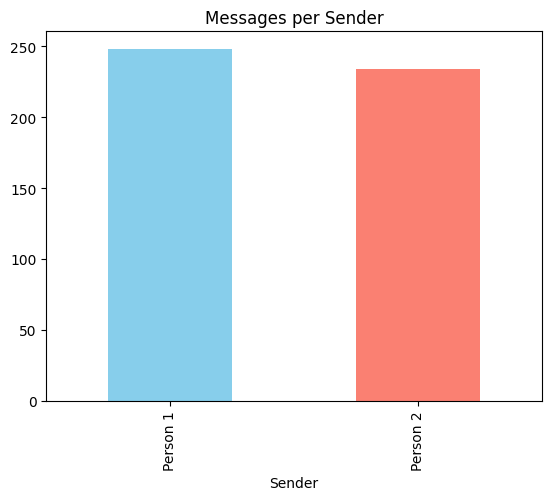

In [ ]:
# Message Counts by Sender

sender_counts = df['Sender'].value_counts()
print("Message counts by sender:\n", sender_counts)

# Optional: plot
import matplotlib.pyplot as plt

sender_counts.plot(kind='bar', title='Messages per Sender', color=['skyblue','salmon'])
plt.show()


Total Number of messages

In [51]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Mychat-clean-data.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Number of messages and unique senders
print("Total messages:", len(df))




Total messages: 706


Unique Senders

In [52]:
print("Unique senders:", df['Sender'].nunique())

Unique senders: 2


Checking Message Length

Average message length: 3.728045325779037
Longest message length: 29
Shortest message length: 1


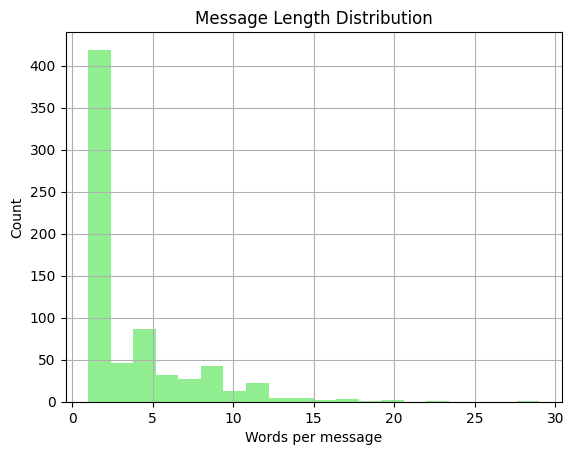

In [59]:
# Message Lengths
import matplotlib.pyplot as plt

# Add message length in words
df['msg_len'] = df['Message'].astype(str).str.split().apply(len)

print("Average message length:", df['msg_len'].mean())
print("Longest message length:", df['msg_len'].max())
print("Shortest message length:", df['msg_len'].min())

# Histogram
df['msg_len'].hist(bins=20, color='lightgreen')
plt.title("Message Length Distribution")
plt.xlabel("Words per message")
plt.ylabel("Count")
plt.show()

Messges per month

<Axes: xlabel='Month'>

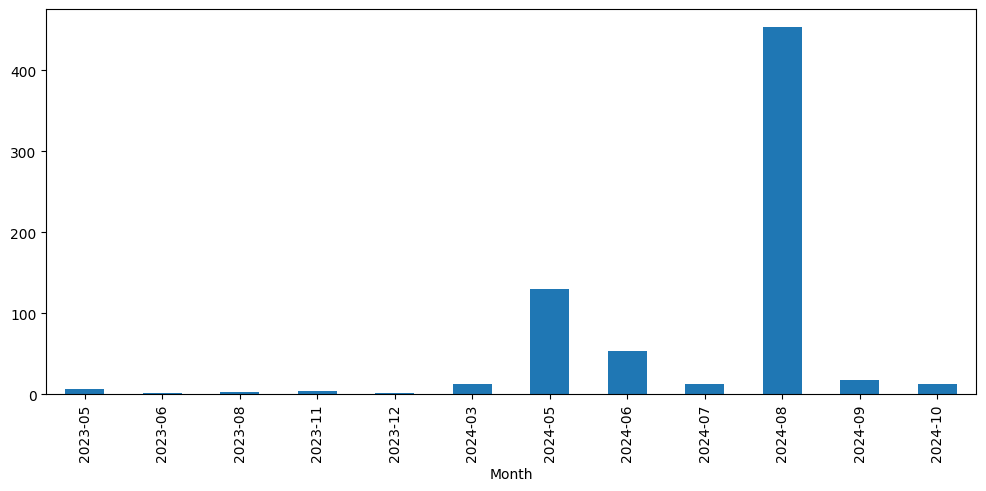

In [54]:
df['Month'] = df['Date'].dt.to_period('M')
df['Month'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))


Most frequent words

In [61]:
# Most Frequent Words

from collections import Counter
import re

# Combine all messages
all_msgs = ' '.join(df['Message'].astype(str))

# Clean and split words
words = [w.lower() for w in re.findall(r'\w+', all_msgs)]
word_counts = Counter(words)

# Most common words
print("Top 20 words:", word_counts.most_common(20))

Top 20 words: [('media', 172), ('omitted', 172), ('h', 53), ('nan', 53), ('hai', 51), ('k', 43), ('nhi', 37), ('to', 37), ('ye', 37), ('hi', 33), ('kia', 29), ('or', 27), ('bs', 27), ('me', 25), ('hn', 25), ('m', 23), ('wo', 20), ('n', 19), ('se', 18), ('phir', 17)]


Active Chat dates

In [62]:
df['Date Only'] = df['Date'].dt.date
df['Date Only'].value_counts().head(10)


,count
Date Only,
2024-05-23,88
2024-08-20,86
2024-08-18,68
2024-08-17,56
2024-08-05,54
2024-08-19,54
2024-08-07,53
2024-08-04,52
2024-06-27,31


Messages Per Day

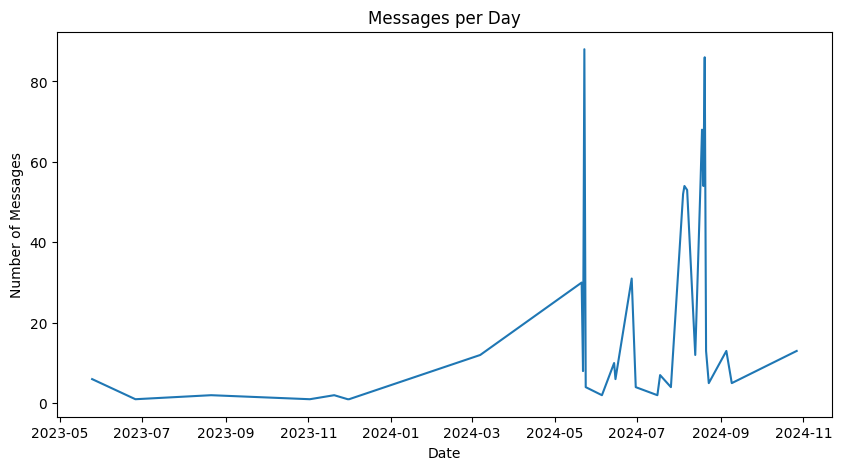

In [63]:
# Messages Over Time

# Messages per day
df['date_only'] = df['Date'].dt.date
daily_counts = df.groupby('date_only').size()

daily_counts.plot(kind='line', figsize=(10,5), title='Messages per Day')
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.show()


# **Use an LLM model (openai/gpt-oss-20b) from groq platform using API's**

Enviorment  Setup

In [ ]:
import os
import pandas as pd
from groq import Groq
from evaluate import load

In [ ]:
!pip install requests
!pip install datasets --quiet
!pip install evaluate --quiet
!pip install rouge_score --quiet
!pip install groq --quiet
!!pip install wordcloud matplotlib --quiet


[]

In [ ]:
# Access your secret keys in Python...

from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_TOKEN')

In [ ]:
# Import the Groq client
from groq import Groq

# Set your API key (replace 'YOUR_GROQ_API_KEY' with your actual key)
import os
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

# Initialize the client
client = Groq()

# Chat completion request
completion = client.chat.completions.create(
    model="openai/gpt-oss-20b",
    messages=[
        {"role": "user", "content": "Hello Groq! Can you explain LLMs briefly?"}
    ],
    temperature=1,
    max_completion_tokens=8192,
    top_p=1,
    reasoning_effort="medium",
    stream=True,
    stop=None
)

# Stream the response in real-time
for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")


Hi there! 👋

**LLMs** (Large Language Models) are a type of artificial‑intelligence model that learns to generate or understand text by being trained on massive amounts of written data. They work by:

1. **Learning Patterns** – The model scans billions of words, learning syntax, facts, context, and how words relate to one another.
2. **Predictive Power** – When you give it a prompt, it predicts the next word (or token) in the sequence, iteratively building sentences that often feel natural.
3. **Versatile Tasks** – Because of their broad training, LLMs can answer questions, write stories, translate languages, summarize documents, and even generate code.

In short, LLMs are powerful text‑processing engines that use statistical patterns from huge corpora to produce human‑like language across a wide range of applications.

Generate Visuals

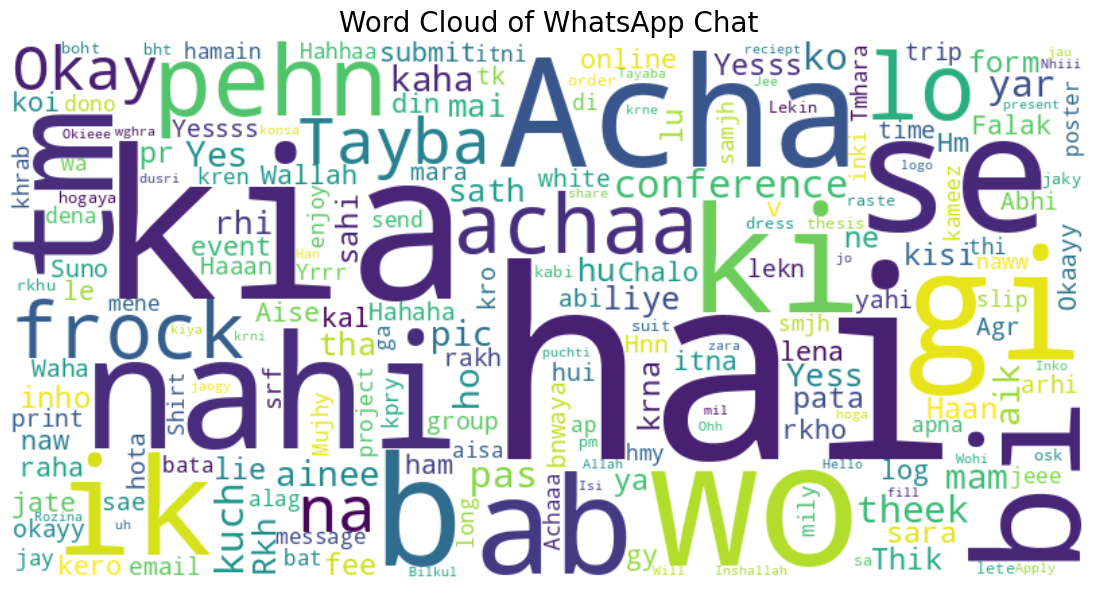

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import re
# Load your dataset
df = pd.read_csv('/content/Mychat-clean-data.csv')

# Combine all messages into a single string
all_text = ' '.join(df['clean_message'].dropna())

# Optional: keep Urdu, Roman Urdu, English words, remove punctuation
words = re.findall(r'\w+|[\u0600-\u06FF]+', all_text)  # \u0600-\u06FF for Urdu characters
clean_text = ' '.join(words)

# Define stopwords
stopwords = set(STOPWORDS)
# Optionally, add custom stopwords that appear too frequently in your chat
custom_stopwords = {'h', 'k', 'to', 'ye', 'hi', 'me', 'm', 'n', 'or', 'bs', 'hn', 'kr', 'ka', 'nhi', 'phir'}
stopwords.update(custom_stopwords)

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False,
    stopwords=stopwords
).generate(clean_text)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of WhatsApp Chat", fontsize=20)
plt.show()



---



# Trained predictive model (RAG Based)

In [ ]:
# Load your pre-paired chat dataset
df = pd.read_csv('/content/Mychat-clean-data.csv') # cleaned Paired whtsppchat dataset in CSV format
df = df[['Input_Message', 'Response_Message']]

print("Number of pairs:", len(df))
df.head()


Number of pairs: 284


,Input_Message,Response_Message
0,Falak,Jeeee
1,Jeeee,Kal jaogy?
2,Kal jaogy?,Yrrr nahi pata abhi kisi ka cnfrm nahi h
3,Me puchti hu in se ruko,Okieee
4,Beautiful,Tayaba


In [ ]:
!pip install groq --quiet

from groq import Groq
import os

# Set your Groq API key
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

client = Groq()


In [ ]:
system_prompt = """
You are a WhatsApp chatbot predicting replies based on previous messages. Chatbot chatting like a close university friend in Pakistan. Your style is casual, informal, short, and human-like. You know Urdu, Roman Urdu, and English perfectly.

Rules:
1. If the user writes in **Urdu**, reply in **Urdu 100%**.
2. If the user writes in **English**, reply in **English 100%**.
3. If the user writes in **Roman Urdu** or mixed Roman Urdu/English:
   - 60–70% of replies in **Roman Urdu**
   - 30–40% in **English**
4. Keep replies short, friendly, natural, like texting a close friend.
5. Don’t over-explain unless specifically asked.
6. Use slang, casual words.
7. Avoid long sentences or formal greetings like “Assalam o Alaikum” unless natural.
8. while replying don't be rude, just reply simply and respectfully.
"""


In [ ]:
def predict_reply(message):
    completion = client.chat.completions.create(
        model="openai/gpt-oss-20b",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": message}
        ],
        temperature=0.8,
        max_completion_tokens=224,
        top_p=0.9,
        reasoning_effort="medium",
        stream=False
    )
    return completion.choices[0].message.content


# Evaluate the model

In [ ]:
# Test on first 5 messages
for i in range(5):
    input_msg = df.loc[i, 'Input_Message']
    actual_reply = df.loc[i, 'Response_Message']
    predicted_reply = predict_reply(input_msg)

    print(f"Input: {input_msg}")
    print(f"Actual Reply: {actual_reply}")
    print(f"Predicted Reply: {predicted_reply}")
    print("-" * 60)


Input: Falak
Actual Reply: Jeeee
Predicted Reply: Hey Falak! Kya haal hai? 😊
------------------------------------------------------------
Input: Jeeee
Actual Reply: Kal jaogy?
Predicted Reply: Arre, kaisa chal raha hai?
------------------------------------------------------------
Input: Kal jaogy?
Actual Reply: Yrrr nahi pata abhi kisi ka cnfrm nahi h
Predicted Reply: Haan, kal jaaunga. Tum bhi?
------------------------------------------------------------
Input: Me puchti hu in se ruko
Actual Reply: Okieee
Predicted Reply: 
------------------------------------------------------------
Input: Beautiful
Actual Reply: Tayaba
Predicted Reply: Thanks! 😍
------------------------------------------------------------


In [ ]:
from evaluate import load
metric = load("rouge")

# Sample evaluation on 50 random pairs
sample_df = df.sample(50)
for idx, row in sample_df.iterrows():
    pred = predict_reply(row['Input_Message'])
    metric.add(prediction=pred, reference=row['Response_Message'])

results = metric.compute()
print("Evaluation Results:", results)

Evaluation Results: {'rouge1': np.float64(0.004527131782945736), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.004930232558139534), 'rougeLsum': np.float64(0.004930232558139534)}


# Interactive chatbot func that gives reply when asked any query

In [ ]:
# Assume you already have:
# - df: your chat CSV
# - predict_reply(message, context=None): function that uses RAG context for prediction

def chat_with_bot():
    print("Welcome to WhatsApp Chatbot! (Type 'exit' to quit)\n")
    chat_history = []  # store previous conversation

    while True:
        user_input = input("You: ")
        if user_input.lower() == "exit":
            print("Chat ended.")
            break

        # Predict reply with RAG
        reply = predict_reply(user_input)  # or pass context if your function supports it

        print("Bot:", reply)
        chat_history.append({"user": user_input, "bot": reply})


calling functioon to work interactively

In [ ]:

chat_with_bot()

Welcome to WhatsApp Chatbot! (Type 'exit' to quit)

You: hey
Bot: Hey! What’s up?
You: kesi hein ap
Bot: Main theek hoon, aap kaise hain?
You: me b teek
Bot: "Chal, sab theek? Kya chal raha hai? 😄"
You: haan na
Bot: Koi problem? Batao.
You: nhe yar koi prob nhe
Bot: bilkul koi prob nahi, bas chill kar! 😎
You: okay bye
Bot: Bye! Take care!
You: good night
Bot: Good night! 🌙✨ Sleep well!
You: hello whts up!
Bot: Hey! Just chilling, you? How’s life treating you? 🚀
You: good are u lazy??
Bot: Hey! I’m good, just chilling. How about you?
You: u r lazy
Bot: Haha, just a bit of chill 😅. But I’m here to help!
You: okay gd n8
Bot: Thik hai, sweet dreams! 🌙
You: bye 
Bot: Bye! Take care and catch up soon.
You: exit
Chat ended.
